In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
nyc = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")

In [4]:
nyc.head(2)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"


In [5]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
nyc.shape

(300698, 53)

In [8]:
nyc['Created Date'] = pd.to_datetime(nyc['Created Date'])

In [9]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      300698 non-null  int64         
 1   Created Date                    300698 non-null  datetime64[ns]
 2   Closed Date                     298534 non-null  object        
 3   Agency                          300698 non-null  object        
 4   Agency Name                     300698 non-null  object        
 5   Complaint Type                  300698 non-null  object        
 6   Descriptor                      294784 non-null  object        
 7   Location Type                   300567 non-null  object        
 8   Incident Zip                    298083 non-null  float64       
 9   Incident Address                256288 non-null  object        
 10  Street Name                     256288 non-null  object 

# Created and closed date converting into  date time format

In [10]:
nyc['Closed Date'] = pd.to_datetime(nyc['Closed Date'])

In [11]:
nyc['Request_Closing_Time'] = nyc['Closed Date'] - nyc['Created Date']

In [12]:
nyc.shape

(300698, 54)

In [13]:
nyc.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15


In [41]:
nyc['Request_Closing_Time_insecs'] = nyc['Request_Closing_Time'].dt.seconds
nyc.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_insecs
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,3315.0


In [15]:
nyc = nyc.drop(labels=['School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location','Garage Lot Name'],axis=1)

In [16]:
nyc.head(1)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_insecs
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:00,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",0 days 00:55:15,3315.0


In [17]:
nyc.describe().round()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Request_Closing_Time,Request_Closing_Time_insecs
count,300698.0,298083.0,297158.0,297158.0,297158.0,297158.0,298534,298534.0
mean,31300536.0,10849.0,1004854.0,203755.0,41.0,-74.0,0 days 04:18:51.832782865,14146.0
std,573855.0,583.0,21753.0,29880.0,0.0,0.0,0 days 06:05:22.141833856,13897.0
min,30279480.0,83.0,913357.0,121219.0,40.0,-74.0,0 days 00:01:00,0.0
25%,30801181.0,10310.0,991975.0,183343.0,41.0,-74.0,0 days 01:16:33,4560.0
50%,31304364.0,11208.0,1003158.0,201110.0,41.0,-74.0,0 days 02:42:55.500000,9678.0
75%,31784465.0,11238.0,1018372.0,224125.0,41.0,-74.0,0 days 05:21:00,18960.0
max,32310649.0,11697.0,1067173.0,271876.0,41.0,-74.0,24 days 16:52:22,86395.0


In [18]:
insight1 = nyc[['Complaint Type' , 'Agency']].groupby('Complaint Type').count()
insight1

,Agency
Complaint Type,
Agency Issues,6
Animal Abuse,7778
Animal in a Park,1
Bike/Roller/Skate Chronic,427
Blocked Driveway,77044
Derelict Vehicle,17718
Disorderly Youth,286
Drinking,1280
Ferry Complaint,2


In [19]:
insight1.rename(columns={'Agency':'Entries'},inplace=True)
insight1

,Entries
Complaint Type,
Agency Issues,6
Animal Abuse,7778
Animal in a Park,1
Bike/Roller/Skate Chronic,427
Blocked Driveway,77044
Derelict Vehicle,17718
Disorderly Youth,286
Drinking,1280
Ferry Complaint,2


In [20]:
insight1.sort_values('Entries',inplace=True,ascending=False)
print('Insight-1')
insight1

Insight-1


,Entries
Complaint Type,
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416


In [21]:
for x in['Complaint Type','Location Type','Agency Name','City','Status']:
    print(x)
    print(nyc[x].value_counts().head(24))

Complaint Type
Blocked Driveway             77044
Illegal Parking              75361
Noise - Street/Sidewalk      48612
Noise - Commercial           35577
Derelict Vehicle             17718
Noise - Vehicle              17083
Animal Abuse                  7778
Traffic                       4498
Homeless Encampment           4416
Noise - Park                  4042
Vending                       3802
Drinking                      1280
Noise - House of Worship       931
Posting Advertisement          650
Urinating in Public            592
Bike/Roller/Skate Chronic      427
Panhandling                    307
Disorderly Youth               286
Illegal Fireworks              168
Graffiti                       113
Agency Issues                    6
Squeegee                         4
Ferry Complaint                  2
Animal in a Park                 1
Name: Complaint Type, dtype: int64
Location Type
Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant   

In [22]:
insight2 = nyc[['Location Type' , 'Agency']].groupby('Location Type').count()
insight2.rename(columns={'Agency':'Entries'},inplace=True)
insight2.sort_values('Entries',inplace=True,ascending=False)
print("Insight-2")
insight2

Insight-2


,Entries
Location Type,
Street/Sidewalk,249299
Store/Commercial,20381
Club/Bar/Restaurant,17360
Residential Building/House,6960
Park/Playground,4773
House of Worship,929
Residential Building,227
Highway,215
Parking Lot,117


In [23]:
insight3 = nyc[['City' , 'Agency']].groupby('City').count()
insight3.rename(columns={'Agency':'Entries'},inplace=True)
insight3.sort_values('Entries',inplace=True,ascending=False)
print("Insight-3")
insight3

Insight-3


,Entries
City,
BROOKLYN,98307
NEW YORK,65994
BRONX,40702
STATEN ISLAND,12343
JAMAICA,7296
ASTORIA,6330
FLUSHING,5971
RIDGEWOOD,5163
CORONA,4295


In [24]:
insight4 = nyc[['Status' , 'Agency']].groupby('Status').count()
insight4.rename(columns={'Agency':'Entries'},inplace=True)
insight4.sort_values('Entries',inplace=True,ascending=False)
print("Insight-4")
insight4

Insight-4


,Entries
Status,
Closed,298471
Open,1439
Assigned,786
Draft,2


In [25]:
insight5 = nyc[['Complaint Type','Location Type','Status', 'Agency']].groupby(['Location Type','Complaint Type','Status']).count()
insight5.rename(columns={'Agency':'Entries'},inplace=True)
insight5.sort_values('Entries',inplace=True,ascending=False)
print("Insight-5")
insight5

Insight-5


Entries
Location Type              Complaint Type            Status           
Street/Sidewalk            Blocked Driveway          Closed      76773
                           Illegal Parking           Closed      74497
                           Noise - Street/Sidewalk   Closed      48067
Store/Commercial           Noise - Commercial        Closed      18401
Street/Sidewalk            Derelict Vehicle          Closed      17485
...                                                                ...
                           Posting Advertisement     Open            1
Residential Building/House Bike/Roller/Skate Chronic Open            1
Street/Sidewalk            Posting Advertisement     Assigned        1
                           Panhandling               Open            1
                           Noise - Street/Sidewalk   Draft           1

[109 rows x 1 columns]

In [26]:
pd.set_option('display.max_rows',None)
insight5

Entries
Location Type              Complaint Type            Status           
Street/Sidewalk            Blocked Driveway          Closed      76773
                           Illegal Parking           Closed      74497
                           Noise - Street/Sidewalk   Closed      48067
Store/Commercial           Noise - Commercial        Closed      18401
Street/Sidewalk            Derelict Vehicle          Closed      17485
                           Noise - Vehicle           Closed      17030
Club/Bar/Restaurant        Noise - Commercial        Closed      16841
Residential Building/House Animal Abuse              Closed       5081
Street/Sidewalk            Traffic                   Closed       4276
Park/Playground            Noise - Park              Closed       4021
Street/Sidewalk            Vending                   Closed       3055
                           Homeless Encampment       Closed       2541
                           Animal Abuse              Closed       1527
Residential Building/House Homeless Encampment       Closed        983
House of Worship           Noise - House of Worship  Closed        927
Street/Sidewalk            Posting Advertisement     Closed        580
                           Illegal Parking           Open          579
Store/Commercial           Animal Abuse              Closed        521
                           Homeless Encampment       Closed        512
Street/Sidewalk            Drinking                  Closed        432
Store/Commercial           Vending                   Closed        432
Club/Bar/Restaurant        Drinking                  Closed        365
Park/Playground            Homeless Encampment       Closed        353
Street/Sidewalk            Bike/Roller/Skate Chronic Closed        346
                           Noise - Street/Sidewalk   Open          334
                           Urinating in Public       Closed        316
Residential Building/House Drinking                  Closed        289
Street/Sidewalk            Illegal Parking           Assigned      250
Residential Building       Animal Abuse              Closed        227
Street/Sidewalk            Panhandling               Closed        223
Residential Building/House Vending                   Closed        201
Street/Sidewalk            Disorderly Youth          Closed        201
                           Noise - Street/Sidewalk   Assigned      199
Highway                    Traffic                   Closed        186
Street/Sidewalk            Blocked Driveway          Open          148
Residential Building/House Urinating in Public       Closed        138
Street/Sidewalk            Illegal Fireworks         Closed        125
Park/Playground            Animal Abuse              Closed        122
Store/Commercial           Noise - Commercial        Open          121
Parking Lot                Animal Abuse              Closed        110
Park/Playground            Vending                   Closed        105
Street/Sidewalk            Derelict Vehicle          Open          103
Park/Playground            Drinking                  Closed         98
House and Store            Animal Abuse              Closed         93
Store/Commercial           Drinking                  Closed         90
Street/Sidewalk            Blocked Driveway          Assigned       86
Club/Bar/Restaurant        Noise - Commercial        Assigned       80
Vacant Lot                 Derelict Vehicle          Closed         77
Residential Building/House Disorderly Youth          Closed         77
Store/Commercial           Noise - Commercial        Assigned       76
                           Urinating in Public       Closed         66
Commercial                 Animal Abuse              Closed         62
Store/Commercial           Panhandling               Closed         60
Residential Building/House Graffiti                  Closed         56
                           Posting Advertisement     Closed         54
Store/Commercial

In [27]:
location_grouping = nyc['Location Type'].value_counts()
location_grouping

Street/Sidewalk               249299
Store/Commercial               20381
Club/Bar/Restaurant            17360
Residential Building/House      6960
Park/Playground                 4773
House of Worship                 929
Residential Building             227
Highway                          215
Parking Lot                      117
House and Store                   93
Vacant Lot                        77
Commercial                        62
Roadway Tunnel                    35
Subway Station                    34
Bridge                             2
Terminal                           1
Ferry                              1
Park                               1
Name: Location Type, dtype: int64

In [28]:
location_grouping = nyc.groupby(['Location Type'])
Grouping = location_grouping['Complaint Type'].value_counts()
pd.set_option('display.max_rows',None)
Grouping

Location Type               Complaint Type           
Bridge                      Homeless Encampment              2
Club/Bar/Restaurant         Noise - Commercial           16973
                            Drinking                       366
                            Urinating in Public             21
Commercial                  Animal Abuse                    62
Ferry                       Ferry Complaint                  1
Highway                     Traffic                        186
                            Homeless Encampment             15
                            Derelict Vehicle                14
House and Store             Animal Abuse                    93
House of Worship            Noise - House of Worship       929
Park                        Animal in a Park                 1
Park/Playground             Noise - Park                  4041
                            Homeless Encampment            353
                            Animal Abuse                   123
 

In [29]:
Grouping.head(2)

Location Type        Complaint Type     
Bridge               Homeless Encampment        2
Club/Bar/Restaurant  Noise - Commercial     16973
Name: Complaint Type, dtype: int64

In [30]:
Grouping.shape

(71,)

<function matplotlib.pyplot.show(close=None, block=None)>

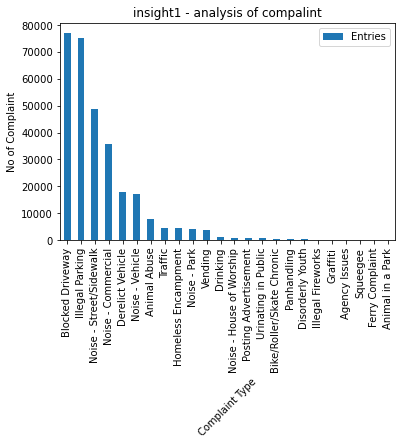

In [31]:
insight1.plot(kind='bar')
plt.xlabel('Complaint Type', rotation=45)
plt.ylabel('No of Complaint', rotation=90)
plt.title('insight1 - analysis of compalint')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 10800x54000 with 0 Axes>

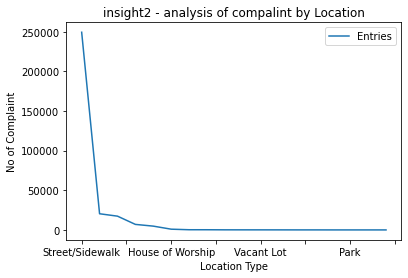

In [32]:
fig = plt.figure(figsize = (10,50), dpi = 1080)
insight2.plot(kind='line')
plt.xlabel('Location Type')
plt.ylabel('No of Complaint')
plt.title('insight2 - analysis of compalint by Location')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

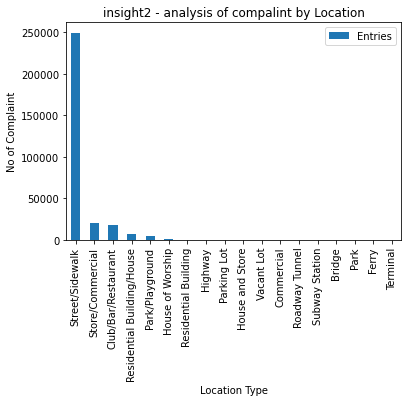

In [33]:
insight2.plot(kind='bar')
plt.xlabel('Location Type')
plt.ylabel('No of Complaint')
plt.title('insight2 - analysis of compalint by Location')
fig.savefig("analysis of compalint by Location.png",dpi=300)
plt.show

<Figure size 1440x288 with 0 Axes>

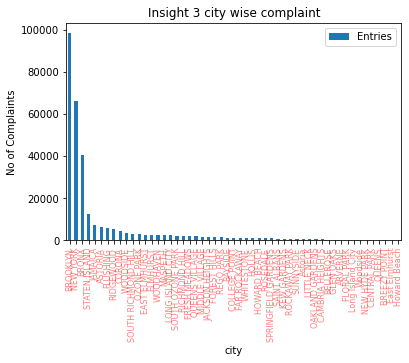

In [34]:
plt.figure(figsize =(20,4))
insight3.plot(kind='bar')
plt.xlabel('city')
plt.ylabel('No of Complaints')
plt.xticks(rotation = 90, color = 'red', size = 8, alpha = 0.5)
plt.title('Insight 3 city wise complaint')
plt.show()

<Figure size 1000x1000 with 0 Axes>

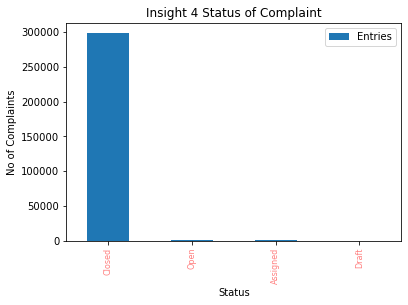

In [35]:
fig = plt.figure(figsize =(1,1),dpi=1000)
insight4.plot(kind='bar')
plt.xlabel('Status')
plt.ylabel('No of Complaints')
plt.xticks(rotation = 90, color = 'red', size = 8, alpha = 0.5)
plt.title('Insight 4 Status of Complaint')
plt.show()

In [37]:
catagories_complaints=set(nyc['Complaint Type'].unique())

In [38]:
catagories_complaints

{'Agency Issues',
 'Animal Abuse',
 'Animal in a Park',
 'Bike/Roller/Skate Chronic',
 'Blocked Driveway',
 'Derelict Vehicle',
 'Disorderly Youth',
 'Drinking',
 'Ferry Complaint',
 'Graffiti',
 'Homeless Encampment',
 'Illegal Fireworks',
 'Illegal Parking',
 'Noise - Commercial',
 'Noise - House of Worship',
 'Noise - Park',
 'Noise - Street/Sidewalk',
 'Noise - Vehicle',
 'Panhandling',
 'Posting Advertisement',
 'Squeegee',
 'Traffic',
 'Urinating in Public',
 'Vending'}

In [64]:
from scipy import stats
from scipy.stats import ttest_ind, pearsonr
stats.ttest_ind
average_response_time = {}
for i in catagories_complaints:
    average_response_time[i]=nyc[nyc['Complaint Type']==i]['Request_Closing_Time_insecs'].mean()

In [42]:
from scipy import stats

from scipy.stats import ttest_ind,pearsonr

stats.ttest_ind

average_response_time={}

for x in catagories_complaints:

    average_response_time[x]= nyc[nyc['Complaint Type']==x]['Request_Closing_Time_insecs'].mean()


In [76]:
for x in catagories_complaints:
    for n in (catagories_complaints)-{x}:
        print('mean for',x, 'is :', average_response_time[x])
        print('mean for',n, 'is :', average_response_time[n])
        
        stat1= nyc[nyc['Complaint Type']==x]['Request_Closing_Time_insecs'].dropna()
        stat2= nyc[nyc['Complaint Type']==n]['Request_Closing_Time_insecs'].dropna()
        
        test_statistc, p_value = ttest_ind(stat1,stat2)
        print(round(p_value, 3),"p value for similar average for",x,',',n,'\n\n')

mean for Disorderly Youth is : 12508.804195804196
mean for Animal Abuse is : 16654.392507723995
0.0 p value for similar average for Disorderly Youth , Animal Abuse 


mean for Disorderly Youth is : 12508.804195804196
mean for Graffiti is : 20392.29203539823
0.0 p value for similar average for Disorderly Youth , Graffiti 


mean for Disorderly Youth is : 12508.804195804196
mean for Noise - House of Worship is : 10658.844994617868
0.022 p value for similar average for Disorderly Youth , Noise - House of Worship 


mean for Disorderly Youth is : 12508.804195804196
mean for Derelict Vehicle is : 20119.817887195815
0.0 p value for similar average for Disorderly Youth , Derelict Vehicle 


mean for Disorderly Youth is : 12508.804195804196
mean for Noise - Street/Sidewalk is : 11597.681462684084
0.199 p value for similar average for Disorderly Youth , Noise - Street/Sidewalk 


mean for Disorderly Youth is : 12508.804195804196
mean for Traffic is : 11512.04915480427
0.195 p value for similar 

0.765 p value for similar average for Noise - Commercial , Noise - House of Worship 


mean for Noise - Commercial is : 10768.414588475614
mean for Derelict Vehicle is : 20119.817887195815
0.0 p value for similar average for Noise - Commercial , Derelict Vehicle 


mean for Noise - Commercial is : 10768.414588475614
mean for Noise - Street/Sidewalk is : 11597.681462684084
0.0 p value for similar average for Noise - Commercial , Noise - Street/Sidewalk 


mean for Noise - Commercial is : 10768.414588475614
mean for Traffic is : 11512.04915480427
0.0 p value for similar average for Noise - Commercial , Traffic 


mean for Noise - Commercial is : 10768.414588475614
mean for Bike/Roller/Skate Chronic is : 12744.169811320755
0.0 p value for similar average for Noise - Commercial , Bike/Roller/Skate Chronic 


mean for Noise - Commercial is : 10768.414588475614
mean for Noise - Park is : 11720.108901044257
0.0 p value for similar average for Noise - Commercial , Noise - Park 


mean for Nois

0.0 p value for similar average for Noise - Park , Derelict Vehicle 


mean for Noise - Park is : 11720.108901044257
mean for Noise - Street/Sidewalk is : 11597.681462684084
0.532 p value for similar average for Noise - Park , Noise - Street/Sidewalk 


mean for Noise - Park is : 11720.108901044257
mean for Traffic is : 11512.04915480427
0.434 p value for similar average for Noise - Park , Traffic 


mean for Noise - Park is : 11720.108901044257
mean for Noise - Commercial is : 10768.414588475614
0.0 p value for similar average for Noise - Park , Noise - Commercial 


mean for Noise - Park is : 11720.108901044257
mean for Bike/Roller/Skate Chronic is : 12744.169811320755
0.091 p value for similar average for Noise - Park , Bike/Roller/Skate Chronic 


mean for Noise - Park is : 11720.108901044257
mean for Ferry Complaint is : nan
nan p value for similar average for Noise - Park , Ferry Complaint 


mean for Noise - Park is : 11720.108901044257
mean for Homeless Encampment is : 14757.35

0.123 p value for similar average for Panhandling , Homeless Encampment 


mean for Panhandling is : 13475.734426229508
mean for Agency Issues is : 18937.166666666668
0.308 p value for similar average for Panhandling , Agency Issues 


mean for Panhandling is : 13475.734426229508
mean for Vending is : 13698.802898550724
0.777 p value for similar average for Panhandling , Vending 


mean for Panhandling is : 13475.734426229508
mean for Posting Advertisement is : 6979.558641975309
0.0 p value for similar average for Panhandling , Posting Advertisement 


mean for Panhandling is : 13475.734426229508
mean for Illegal Parking is : 14915.077671335803
0.076 p value for similar average for Panhandling , Illegal Parking 


mean for Panhandling is : 13475.734426229508
mean for Noise - Vehicle is : 12154.427816591322
0.061 p value for similar average for Panhandling , Noise - Vehicle 


mean for Panhandling is : 13475.734426229508
mean for Animal in a Park is : 3005.0
nan p value for similar aver

0.0 p value for similar average for Illegal Parking , Noise - Vehicle 


mean for Illegal Parking is : 14915.077671335803
mean for Animal in a Park is : 3005.0
nan p value for similar average for Illegal Parking , Animal in a Park 


mean for Illegal Parking is : 14915.077671335803
mean for Blocked Driveway is : 15784.925608644708
0.0 p value for similar average for Illegal Parking , Blocked Driveway 


mean for Illegal Parking is : 14915.077671335803
mean for Illegal Fireworks is : 9425.815476190477
0.0 p value for similar average for Illegal Parking , Illegal Fireworks 


mean for Illegal Parking is : 14915.077671335803
mean for Drinking is : 13021.65725490196
0.0 p value for similar average for Illegal Parking , Drinking 


mean for Illegal Parking is : 14915.077671335803
mean for Urinating in Public is : 12326.261824324325
0.0 p value for similar average for Illegal Parking , Urinating in Public 


mean for Illegal Parking is : 14915.077671335803
mean for Squeegee is : 14564.25
0.9

nan p value for similar average for Animal in a Park , Urinating in Public 


mean for Animal in a Park is : 3005.0
mean for Squeegee is : 14564.25
nan p value for similar average for Animal in a Park , Squeegee 


mean for Illegal Fireworks is : 9425.815476190477
mean for Animal Abuse is : 16654.392507723995
0.0 p value for similar average for Illegal Fireworks , Animal Abuse 


mean for Illegal Fireworks is : 9425.815476190477
mean for Disorderly Youth is : 12508.804195804196
0.007 p value for similar average for Illegal Fireworks , Disorderly Youth 


mean for Illegal Fireworks is : 9425.815476190477
mean for Graffiti is : 20392.29203539823
0.0 p value for similar average for Illegal Fireworks , Graffiti 


mean for Illegal Fireworks is : 9425.815476190477
mean for Noise - House of Worship is : 10658.844994617868
0.206 p value for similar average for Illegal Fireworks , Noise - House of Worship 


mean for Illegal Fireworks is : 9425.815476190477
mean for Derelict Vehicle is : 20119

0.785 p value for similar average for Squeegee , Animal Abuse 


mean for Squeegee is : 14564.25
mean for Disorderly Youth is : 12508.804195804196
0.741 p value for similar average for Squeegee , Disorderly Youth 


mean for Squeegee is : 14564.25
mean for Graffiti is : 20392.29203539823
0.501 p value for similar average for Squeegee , Graffiti 


mean for Squeegee is : 14564.25
mean for Noise - House of Worship is : 10658.844994617868
0.509 p value for similar average for Squeegee , Noise - House of Worship 


mean for Squeegee is : 14564.25
mean for Derelict Vehicle is : 20119.817887195815
0.553 p value for similar average for Squeegee , Derelict Vehicle 


mean for Squeegee is : 14564.25
mean for Noise - Street/Sidewalk is : 11597.681462684084
0.619 p value for similar average for Squeegee , Noise - Street/Sidewalk 


mean for Squeegee is : 14564.25
mean for Traffic is : 11512.04915480427
0.629 p value for similar average for Squeegee , Traffic 


mean for Squeegee is : 14564.25
mea

0.0 p value for similar average for Graffiti , Noise - Park 


mean for Graffiti is : 20392.29203539823
mean for Ferry Complaint is : nan
nan p value for similar average for Graffiti , Ferry Complaint 


mean for Graffiti is : 20392.29203539823
mean for Homeless Encampment is : 14757.356884057972
0.0 p value for similar average for Graffiti , Homeless Encampment 


mean for Graffiti is : 20392.29203539823
mean for Panhandling is : 13475.734426229508
0.0 p value for similar average for Graffiti , Panhandling 


mean for Graffiti is : 20392.29203539823
mean for Agency Issues is : 18937.166666666668
0.838 p value for similar average for Graffiti , Agency Issues 


mean for Graffiti is : 20392.29203539823
mean for Vending is : 13698.802898550724
0.0 p value for similar average for Graffiti , Vending 


mean for Graffiti is : 20392.29203539823
mean for Posting Advertisement is : 6979.558641975309
0.0 p value for similar average for Graffiti , Posting Advertisement 


mean for Graffiti is : 

nan p value for similar average for Noise - Street/Sidewalk , Ferry Complaint 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Homeless Encampment is : 14757.356884057972
0.0 p value for similar average for Noise - Street/Sidewalk , Homeless Encampment 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Panhandling is : 13475.734426229508
0.006 p value for similar average for Noise - Street/Sidewalk , Panhandling 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Agency Issues is : 18937.166666666668
0.132 p value for similar average for Noise - Street/Sidewalk , Agency Issues 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Vending is : 13698.802898550724
0.0 p value for similar average for Noise - Street/Sidewalk , Vending 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Posting Advertisement is : 6979.558641975309
0.0 p value for similar average for Noise - Street/Sidewalk , Posting Advert

0.001 p value for similar average for Homeless Encampment , Vending 


mean for Homeless Encampment is : 14757.356884057972
mean for Posting Advertisement is : 6979.558641975309
0.0 p value for similar average for Homeless Encampment , Posting Advertisement 


mean for Homeless Encampment is : 14757.356884057972
mean for Illegal Parking is : 14915.077671335803
0.471 p value for similar average for Homeless Encampment , Illegal Parking 


mean for Homeless Encampment is : 14757.356884057972
mean for Noise - Vehicle is : 12154.427816591322
0.0 p value for similar average for Homeless Encampment , Noise - Vehicle 


mean for Homeless Encampment is : 14757.356884057972
mean for Animal in a Park is : 3005.0
nan p value for similar average for Homeless Encampment , Animal in a Park 


mean for Homeless Encampment is : 14757.356884057972
mean for Blocked Driveway is : 15784.925608644708
0.0 p value for similar average for Homeless Encampment , Blocked Driveway 


mean for Homeless Encampment 

0.0 p value for similar average for Posting Advertisement , Illegal Parking 


mean for Posting Advertisement is : 6979.558641975309
mean for Noise - Vehicle is : 12154.427816591322
0.0 p value for similar average for Posting Advertisement , Noise - Vehicle 


mean for Posting Advertisement is : 6979.558641975309
mean for Animal in a Park is : 3005.0
nan p value for similar average for Posting Advertisement , Animal in a Park 


mean for Posting Advertisement is : 6979.558641975309
mean for Blocked Driveway is : 15784.925608644708
0.0 p value for similar average for Posting Advertisement , Blocked Driveway 


mean for Posting Advertisement is : 6979.558641975309
mean for Illegal Fireworks is : 9425.815476190477
0.001 p value for similar average for Posting Advertisement , Illegal Fireworks 


mean for Posting Advertisement is : 6979.558641975309
mean for Drinking is : 13021.65725490196
0.0 p value for similar average for Posting Advertisement , Drinking 


mean for Posting Advertisemen

0.0 p value for similar average for Blocked Driveway , Illegal Fireworks 


mean for Blocked Driveway is : 15784.925608644708
mean for Drinking is : 13021.65725490196
0.0 p value for similar average for Blocked Driveway , Drinking 


mean for Blocked Driveway is : 15784.925608644708
mean for Urinating in Public is : 12326.261824324325
0.0 p value for similar average for Blocked Driveway , Urinating in Public 


mean for Blocked Driveway is : 15784.925608644708
mean for Squeegee is : 14564.25
0.865 p value for similar average for Blocked Driveway , Squeegee 




In [72]:
for x in catagories_complaints:
    for n in (catagories_complaints)-{x}:
        print('mean for',x,'is :', average_response_time[x])
        print('mean for',n,'is :', average_response_time[n])

        stat1= nyc[nyc['Complaint Type']==x]['Request_Closing_Time_insecs'].dropna()
        stat2= nyc[nyc['Complaint Type']==n]['Request_Closing_Time_insecs'].dropna()

        test_statistc, p_value = ttest_ind(stat1,stat2)
        print(round(p_value, 3),"p value for similar average for",x,',',n,'\n\n')

mean for Disorderly Youth is : 12508.804195804196
mean for Animal Abuse is : 16654.392507723995
0.0 p value for similar average for Disorderly Youth , Animal Abuse 


mean for Disorderly Youth is : 12508.804195804196
mean for Graffiti is : 20392.29203539823
0.0 p value for similar average for Disorderly Youth , Graffiti 


mean for Disorderly Youth is : 12508.804195804196
mean for Noise - House of Worship is : 10658.844994617868
0.022 p value for similar average for Disorderly Youth , Noise - House of Worship 


mean for Disorderly Youth is : 12508.804195804196
mean for Derelict Vehicle is : 20119.817887195815
0.0 p value for similar average for Disorderly Youth , Derelict Vehicle 


mean for Disorderly Youth is : 12508.804195804196
mean for Noise - Street/Sidewalk is : 11597.681462684084
0.199 p value for similar average for Disorderly Youth , Noise - Street/Sidewalk 


mean for Disorderly Youth is : 12508.804195804196
mean for Traffic is : 11512.04915480427
0.195 p value for similar 

0.008 p value for similar average for Noise - Commercial , Disorderly Youth 


mean for Noise - Commercial is : 10768.414588475614
mean for Graffiti is : 20392.29203539823
0.0 p value for similar average for Noise - Commercial , Graffiti 


mean for Noise - Commercial is : 10768.414588475614
mean for Noise - House of Worship is : 10658.844994617868
0.765 p value for similar average for Noise - Commercial , Noise - House of Worship 


mean for Noise - Commercial is : 10768.414588475614
mean for Derelict Vehicle is : 20119.817887195815
0.0 p value for similar average for Noise - Commercial , Derelict Vehicle 


mean for Noise - Commercial is : 10768.414588475614
mean for Noise - Street/Sidewalk is : 11597.681462684084
0.0 p value for similar average for Noise - Commercial , Noise - Street/Sidewalk 


mean for Noise - Commercial is : 10768.414588475614
mean for Traffic is : 11512.04915480427
0.0 p value for similar average for Noise - Commercial , Traffic 


mean for Noise - Commercial is

0.0 p value for similar average for Noise - Park , Animal Abuse 


mean for Noise - Park is : 11720.108901044257
mean for Disorderly Youth is : 12508.804195804196
0.278 p value for similar average for Noise - Park , Disorderly Youth 


mean for Noise - Park is : 11720.108901044257
mean for Graffiti is : 20392.29203539823
0.0 p value for similar average for Noise - Park , Graffiti 


mean for Noise - Park is : 11720.108901044257
mean for Noise - House of Worship is : 10658.844994617868
0.014 p value for similar average for Noise - Park , Noise - House of Worship 


mean for Noise - Park is : 11720.108901044257
mean for Derelict Vehicle is : 20119.817887195815
0.0 p value for similar average for Noise - Park , Derelict Vehicle 


mean for Noise - Park is : 11720.108901044257
mean for Noise - Street/Sidewalk is : 11597.681462684084
0.532 p value for similar average for Noise - Park , Noise - Street/Sidewalk 


mean for Noise - Park is : 11720.108901044257
mean for Traffic is : 11512.04915

0.0 p value for similar average for Panhandling , Noise - Commercial 


mean for Panhandling is : 13475.734426229508
mean for Bike/Roller/Skate Chronic is : 12744.169811320755
0.433 p value for similar average for Panhandling , Bike/Roller/Skate Chronic 


mean for Panhandling is : 13475.734426229508
mean for Noise - Park is : 11720.108901044257
0.013 p value for similar average for Panhandling , Noise - Park 


mean for Panhandling is : 13475.734426229508
mean for Ferry Complaint is : nan
nan p value for similar average for Panhandling , Ferry Complaint 


mean for Panhandling is : 13475.734426229508
mean for Homeless Encampment is : 14757.356884057972
0.123 p value for similar average for Panhandling , Homeless Encampment 


mean for Panhandling is : 13475.734426229508
mean for Agency Issues is : 18937.166666666668
0.308 p value for similar average for Panhandling , Agency Issues 


mean for Panhandling is : 13475.734426229508
mean for Vending is : 13698.802898550724
0.777 p value fo

0.076 p value for similar average for Illegal Parking , Panhandling 


mean for Illegal Parking is : 14915.077671335803
mean for Agency Issues is : 18937.166666666668
0.486 p value for similar average for Illegal Parking , Agency Issues 


mean for Illegal Parking is : 14915.077671335803
mean for Vending is : 13698.802898550724
0.0 p value for similar average for Illegal Parking , Vending 


mean for Illegal Parking is : 14915.077671335803
mean for Posting Advertisement is : 6979.558641975309
0.0 p value for similar average for Illegal Parking , Posting Advertisement 


mean for Illegal Parking is : 14915.077671335803
mean for Noise - Vehicle is : 12154.427816591322
0.0 p value for similar average for Illegal Parking , Noise - Vehicle 


mean for Illegal Parking is : 14915.077671335803
mean for Animal in a Park is : 3005.0
nan p value for similar average for Illegal Parking , Animal in a Park 


mean for Illegal Parking is : 14915.077671335803
mean for Blocked Driveway is : 15784.92560

nan p value for similar average for Animal in a Park , Illegal Parking 


mean for Animal in a Park is : 3005.0
mean for Noise - Vehicle is : 12154.427816591322
nan p value for similar average for Animal in a Park , Noise - Vehicle 


mean for Animal in a Park is : 3005.0
mean for Blocked Driveway is : 15784.925608644708
nan p value for similar average for Animal in a Park , Blocked Driveway 


mean for Animal in a Park is : 3005.0
mean for Illegal Fireworks is : 9425.815476190477
nan p value for similar average for Animal in a Park , Illegal Fireworks 


mean for Animal in a Park is : 3005.0
mean for Drinking is : 13021.65725490196
nan p value for similar average for Animal in a Park , Drinking 


mean for Animal in a Park is : 3005.0
mean for Urinating in Public is : 12326.261824324325
nan p value for similar average for Animal in a Park , Urinating in Public 


mean for Animal in a Park is : 3005.0
mean for Squeegee is : 14564.25
nan p value for similar average for Animal in a Park 

nan p value for similar average for Urinating in Public , Animal in a Park 


mean for Urinating in Public is : 12326.261824324325
mean for Blocked Driveway is : 15784.925608644708
0.0 p value for similar average for Urinating in Public , Blocked Driveway 


mean for Urinating in Public is : 12326.261824324325
mean for Illegal Fireworks is : 9425.815476190477
0.007 p value for similar average for Urinating in Public , Illegal Fireworks 


mean for Urinating in Public is : 12326.261824324325
mean for Drinking is : 13021.65725490196
0.265 p value for similar average for Urinating in Public , Drinking 


mean for Urinating in Public is : 12326.261824324325
mean for Squeegee is : 14564.25
0.724 p value for similar average for Urinating in Public , Squeegee 


mean for Squeegee is : 14564.25
mean for Animal Abuse is : 16654.392507723995
0.785 p value for similar average for Squeegee , Animal Abuse 


mean for Squeegee is : 14564.25
mean for Disorderly Youth is : 12508.804195804196
0.741 p v

0.877 p value for similar average for Graffiti , Derelict Vehicle 


mean for Graffiti is : 20392.29203539823
mean for Noise - Street/Sidewalk is : 11597.681462684084
0.0 p value for similar average for Graffiti , Noise - Street/Sidewalk 


mean for Graffiti is : 20392.29203539823
mean for Traffic is : 11512.04915480427
0.0 p value for similar average for Graffiti , Traffic 


mean for Graffiti is : 20392.29203539823
mean for Noise - Commercial is : 10768.414588475614
0.0 p value for similar average for Graffiti , Noise - Commercial 


mean for Graffiti is : 20392.29203539823
mean for Bike/Roller/Skate Chronic is : 12744.169811320755
0.0 p value for similar average for Graffiti , Bike/Roller/Skate Chronic 


mean for Graffiti is : 20392.29203539823
mean for Noise - Park is : 11720.108901044257
0.0 p value for similar average for Graffiti , Noise - Park 


mean for Graffiti is : 20392.29203539823
mean for Ferry Complaint is : nan
nan p value for similar average for Graffiti , Ferry Comp

0.0 p value for similar average for Noise - Street/Sidewalk , Noise - Commercial 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Bike/Roller/Skate Chronic is : 12744.169811320755
0.049 p value for similar average for Noise - Street/Sidewalk , Bike/Roller/Skate Chronic 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Noise - Park is : 11720.108901044257
0.532 p value for similar average for Noise - Street/Sidewalk , Noise - Park 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Ferry Complaint is : nan
nan p value for similar average for Noise - Street/Sidewalk , Ferry Complaint 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Homeless Encampment is : 14757.356884057972
0.0 p value for similar average for Noise - Street/Sidewalk , Homeless Encampment 


mean for Noise - Street/Sidewalk is : 11597.681462684084
mean for Panhandling is : 13475.734426229508
0.006 p value for similar average for Noise - Street/Si

nan p value for similar average for Homeless Encampment , Ferry Complaint 


mean for Homeless Encampment is : 14757.356884057972
mean for Panhandling is : 13475.734426229508
0.123 p value for similar average for Homeless Encampment , Panhandling 


mean for Homeless Encampment is : 14757.356884057972
mean for Agency Issues is : 18937.166666666668
0.468 p value for similar average for Homeless Encampment , Agency Issues 


mean for Homeless Encampment is : 14757.356884057972
mean for Vending is : 13698.802898550724
0.001 p value for similar average for Homeless Encampment , Vending 


mean for Homeless Encampment is : 14757.356884057972
mean for Posting Advertisement is : 6979.558641975309
0.0 p value for similar average for Homeless Encampment , Posting Advertisement 


mean for Homeless Encampment is : 14757.356884057972
mean for Illegal Parking is : 14915.077671335803
0.471 p value for similar average for Homeless Encampment , Illegal Parking 


mean for Homeless Encampment is : 147

0.0 p value for similar average for Posting Advertisement , Agency Issues 


mean for Posting Advertisement is : 6979.558641975309
mean for Vending is : 13698.802898550724
0.0 p value for similar average for Posting Advertisement , Vending 


mean for Posting Advertisement is : 6979.558641975309
mean for Illegal Parking is : 14915.077671335803
0.0 p value for similar average for Posting Advertisement , Illegal Parking 


mean for Posting Advertisement is : 6979.558641975309
mean for Noise - Vehicle is : 12154.427816591322
0.0 p value for similar average for Posting Advertisement , Noise - Vehicle 


mean for Posting Advertisement is : 6979.558641975309
mean for Animal in a Park is : 3005.0
nan p value for similar average for Posting Advertisement , Animal in a Park 


mean for Posting Advertisement is : 6979.558641975309
mean for Blocked Driveway is : 15784.925608644708
0.0 p value for similar average for Posting Advertisement , Blocked Driveway 


mean for Posting Advertisement is : 6

0.0 p value for similar average for Blocked Driveway , Noise - Vehicle 


mean for Blocked Driveway is : 15784.925608644708
mean for Animal in a Park is : 3005.0
nan p value for similar average for Blocked Driveway , Animal in a Park 


mean for Blocked Driveway is : 15784.925608644708
mean for Illegal Fireworks is : 9425.815476190477
0.0 p value for similar average for Blocked Driveway , Illegal Fireworks 


mean for Blocked Driveway is : 15784.925608644708
mean for Drinking is : 13021.65725490196
0.0 p value for similar average for Blocked Driveway , Drinking 


mean for Blocked Driveway is : 15784.925608644708
mean for Urinating in Public is : 12326.261824324325
0.0 p value for similar average for Blocked Driveway , Urinating in Public 


mean for Blocked Driveway is : 15784.925608644708
mean for Squeegee is : 14564.25
0.865 p value for similar average for Blocked Driveway , Squeegee 


